# E91 Implementation

Blake Danziger and Rory Schadler

1. create bell pairs
2. choose measurement for alice, bob
    * rotate $|0\rangle$, $|1\rangle$ by $a \in \{0,\frac{\pi}{4},\frac{\pi}{2}\}$ or $b \in \{\frac{\pi}{4},\frac{\pi}{2},\frac{3\pi}{4}\}$
3. compare results using correlation coefficient $S$
    * $E(\mathbf{a}_i,\mathbf{b}_j) = P_{++}(\mathbf{a}_i,\mathbf{b}_j) + P_{--}(\mathbf{a}_i,\mathbf{b}_j) - P_{-+}(\mathbf{a}_i,\mathbf{b}_j) - P_{-+}(\mathbf{a}_i,\mathbf{b}_j)$
    * $S = E(\mathbf{a}_1,\mathbf{b}_1) - E(\mathbf{a}_1,\mathbf{b}_3) + E(\mathbf{a}_3,\mathbf{b}_1) + E(\mathbf{a}_3,\mathbf{b}_3)$
    * $S = -2\sqrt{2}$ if all is well

Source: [https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.67.661](https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.67.661)

In [1]:
import qiskit
from qiskit import QuantumCircuit, Aer, assemble
from numpy.random import randint
import numpy as np
print("Imports Successful")

Imports Successful


In [2]:
msg_len = 10

In [12]:
def alice_measure(qc):
    chosen_bases = []
    for i in range(msg_len):
        alice_q = 2*i
        base = randint(3)
        chosen_bases.append(base+1)
        rot = np.pi * base / 4
#         qc.h(alice_q)
#         qc.u1(-rot, alice_q)
        qc.u3(-rot/2, 0, 0, alice_q)
        qc.measure(alice_q, alice_q)
    return chosen_bases

def bob_measure(qc):
    chosen_bases = []
    for i in range(msg_len):
        bob_q = 2*i + 1
        base = randint(1,4)
        chosen_bases.append(base)
        rot = np.pi * base / 4
#         qc.h(bob_q)
#         qc.u1(-rot, bob_q)
        qc.u3(-rot/2, 0, 0, bob_q)
        qc.measure(bob_q, bob_q)
    return chosen_bases

# Prepare Bell States
def prepare_bell_state():
    qc = QuantumCircuit(2*msg_len, 2*msg_len)
    for i in range(msg_len):
        q1 = 2*i
        q2 = 2*i + 1
        qc.x(q1)
        qc.x(q2)
        qc.h(q1)
        qc.cx(q1,q2)
    qc.barrier()
    return qc

In [13]:
qc = prepare_bell_state()
a_bases = alice_measure(qc)
b_bases = bob_measure(qc)
qasm_sim = Aer.get_backend('qasm_simulator')
qobj = assemble(qc, shots=1, memory=True)
result = qasm_sim.run(qobj).result()
# get_counts returns a dict, with the classical register as the *key* 
# which feels silly. this ugly idiom retrieves that key. surely a 
# better way to do this
measurements = [k for k in result.get_counts()][0]

In [14]:
for idx, (a_b, b_b) in enumerate(zip(a_bases, b_bases)):
    if((a_b == 2 and b_b == 1) or (a_b == 3 and b_b == 2)):
        a_m = int(measurements[2*idx])
        b_m = int(measurements[2*idx + 1])
        print("match! idx {}, Alice measured {} and Bob measured {}".format(idx, a_m, b_m))

In [15]:
measurements

'10100110101010011010'

In [16]:
for i in range(10):
    print("Run {}".format(i))
    # Prepare Bell States
    qc = prepare_bell_state()
    # add measurements with random bases
    a_bases = alice_measure(qc)
    b_bases = bob_measure(qc)
    qobj = assemble(qc, shots=1, memory=True)
    result = qasm_sim.run(qobj).result()
    # get_counts returns a dict, with the classical register as the *key* 
    # which feels silly. this ugly idiom retrieves that key. surely a 
    # better way to do this
    measurements = [k for k in result.get_counts()][0]
    res = []
    for idx, (a_b, b_b) in enumerate(zip(a_bases, b_bases)):
        if((a_b == 2 and b_b == 1) or (a_b == 3 and b_b == 2)):
            a_m = int(measurements[2*idx])
            b_m = int(measurements[2*idx + 1])
            if(a_m + b_m == 1):
                print("good match")
            else:
                print("bad match idx {}, a_b {}, a_m {}, b_b {}, b_m {}".format(idx, a_b, a_m, b_b, b_m))
        if(a_m + b_m == 1):
            res.append("anti")
        else:
            res.append("corr")
    print(res.count("anti"))

Run 0
good match
good match
good match
10
Run 1
good match
good match
good match
10
Run 2
good match
good match
good match
good match
good match
10
Run 3
good match
10
Run 4
good match
good match
10
Run 5
good match
10
Run 6
good match
good match
good match
good match
10
Run 7
10
Run 8
good match
good match
good match
10
Run 9
good match
good match
good match
good match
10


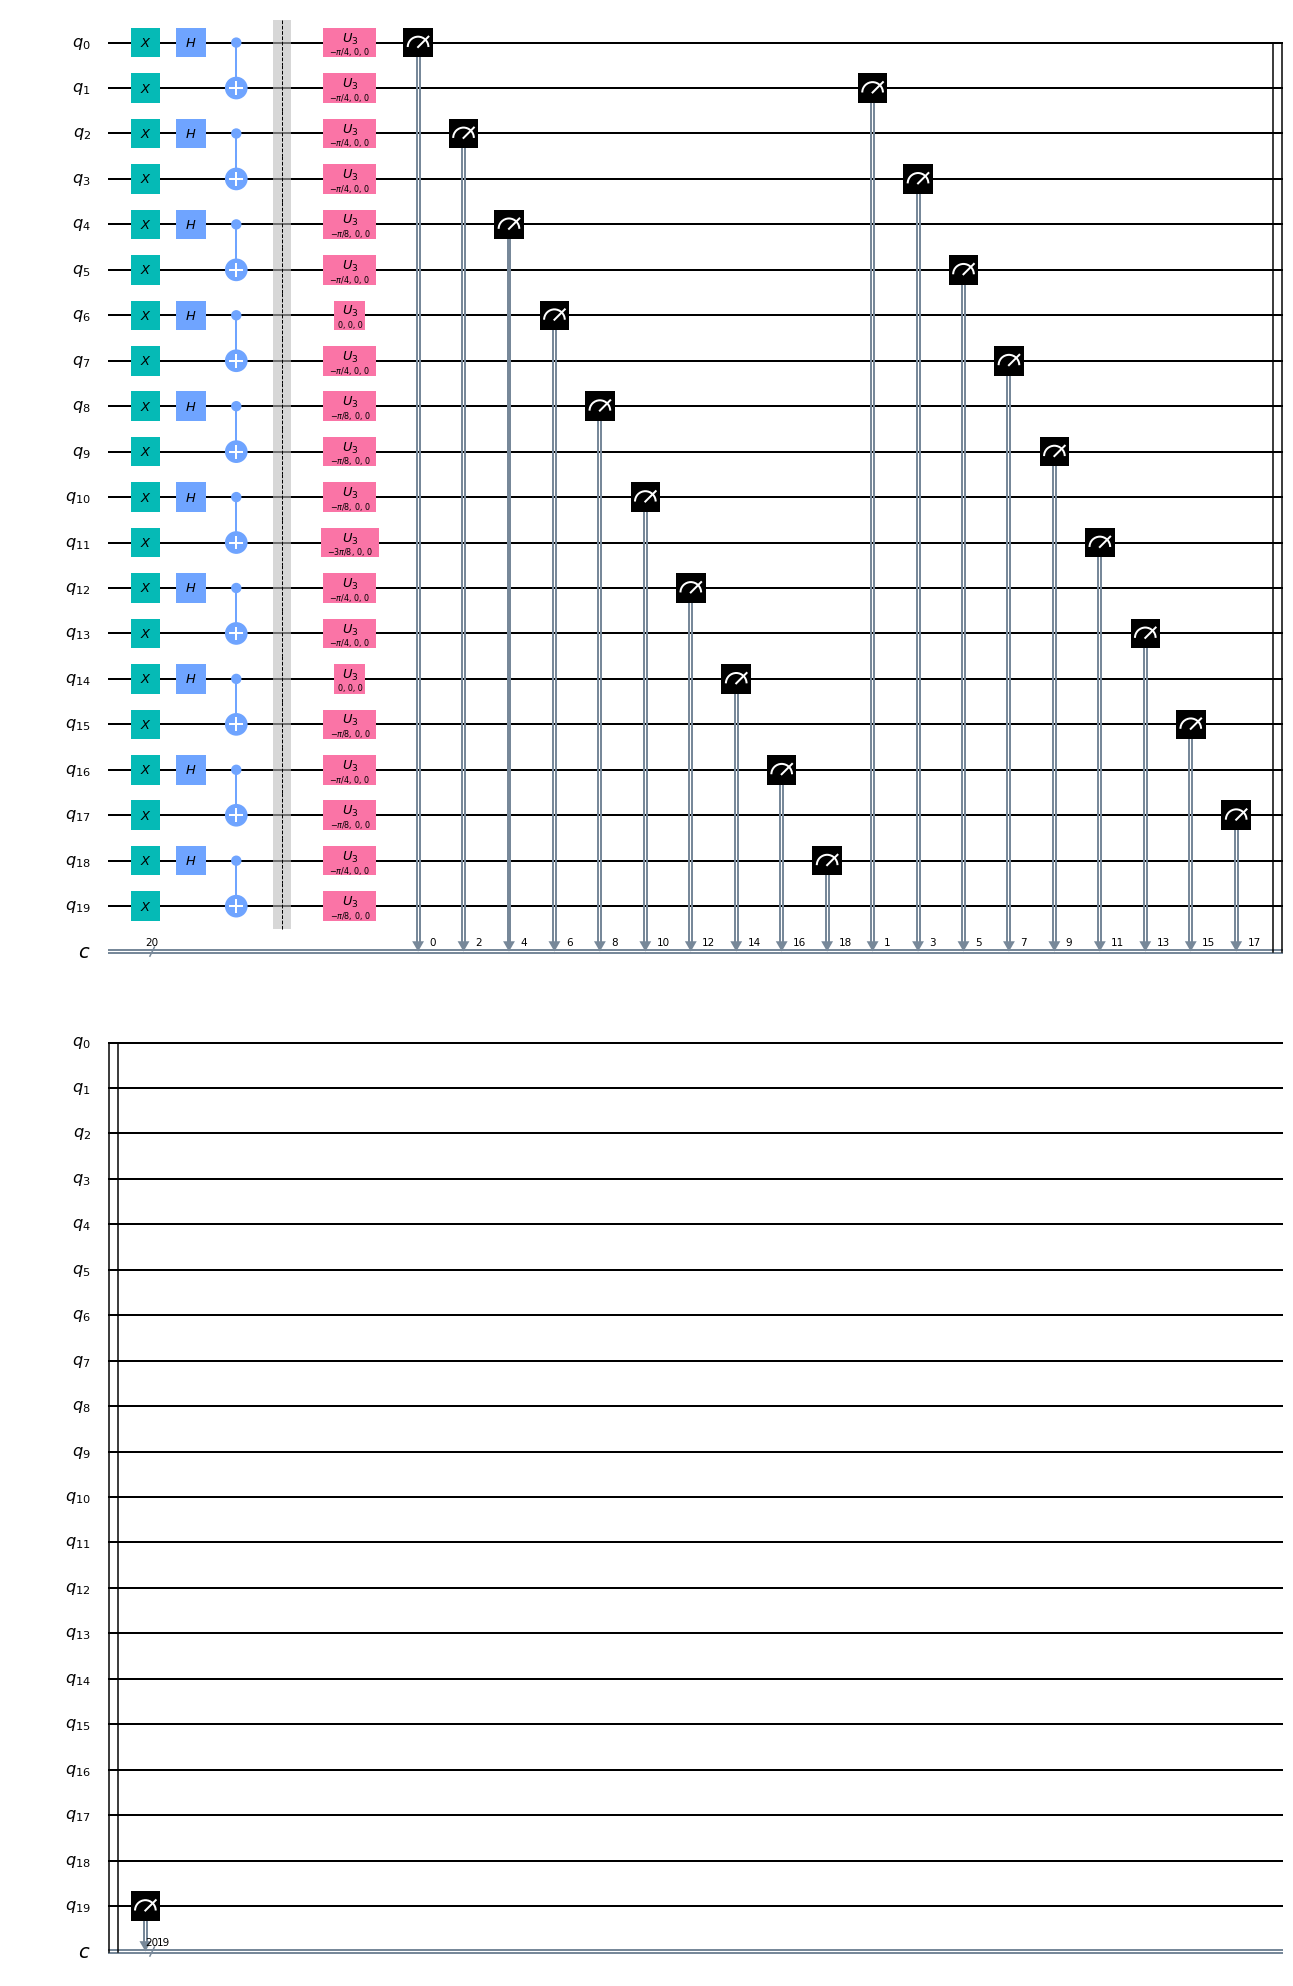

In [17]:
qc.draw(output='mpl')

In [11]:
import qiskit.tools.jupyter
%qiskit_version_table